In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

In [19]:
#Load the data
file_path = "../assets/oecd_bli_2015.csv"
oecd_bli = pd.read_csv(file_path, thousands=",")
print(oecd_bli.head())

  LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total        PC  Percentage               0   
2       L   Value        TOT      Total        PC  Percentage               0   
3       L   Value        TOT      Total        PC  Percentage               0   
4       L   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Va

In [20]:
gdp_per_capita = pd.read_csv("../assets/gdp_per_capita.csv", thousands=",", delimiter="\t", encoding="latin1",
                             na_values="n/a")
print(gdp_per_capita.head())

               Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
3  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
4  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

        2015  Estimates Start After  
0    599.994                 2013.0 

In [24]:
#Prepare the data

def prepare_country_stats(oecd_bli, gdp_per_capita):
    # 1. Filter for 'Total' inequality only
    # The dataset contains rows for 'Men', 'Women', etc. This keeps only the combined total.
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

    # 2. Reshape the table (Pivot)
    # This turns 'Indicator' names (like Life Satisfaction) into actual column headers
    # and sets 'Country' as the row index.
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    gdp_per_capita.head()
    # 3. Rename the GDP column
    # The raw GDP data has a column named '2015'. This renames it to be descriptive.
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

    # # 4. Set the index for merging
    # # This makes 'Country' the unique ID for the GDP table, matching the OECD table.
    # gdp_per_capita.set_index("Country", inplace=True)

    # 5. Merge the two datasets
    # This joins the tables side-by-side where the 'Country' index matches.
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)

    # 6. Sort the data
    # Orders the rows from the poorest countries to the wealthiest.
    full_country_stats.sort_values(by="GDP per capita", inplace=True)

    # 7. Identify "Outlier" indices
    # These specific indices (0, 1, 6, etc.) represent countries that don't fit the
    # linear trend (like Brazil or Luxembourg). They are removed to make the model cleaner.
    remove_indices = [0, 1, 6, 8, 33, 34, 35]

    # 8. Filter indices to keep
    # Creates a list of all indices from 0-35, excluding those in 'remove_indices'.
    keep_indices = list(set(range(36)) - set(remove_indices))

    # 9. Return the final cleaned data
    # Selects only the two columns we want to correlate and returns the filtered rows.
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]




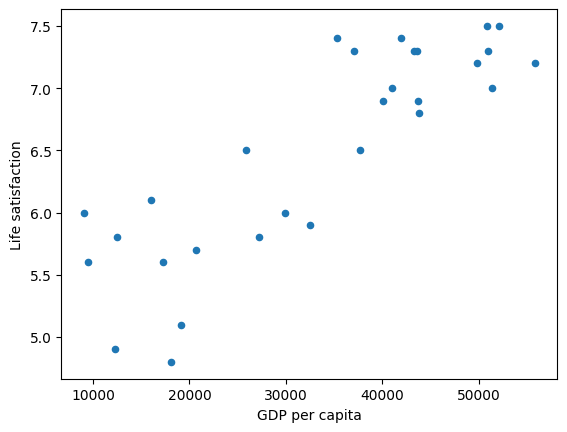

In [25]:
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

In [30]:
#Using Linear Regression Model

model = sklearn.linear_model.LinearRegression()
model.fit(x, y)
qatar_gdp = [[72000]]
print(model.predict(qatar_gdp))

[[8.3893649]]


In [32]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10)
model.fit(x,y)
qatar_gdp = [[72000]]
print(model.predict(qatar_gdp))

[[7.2]]
